In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import defaultdict

# Experimental Constants

In [3]:
NUM_REPEATS = 10
TRAIN_SIZE = 5000

In [4]:
synthetic_results_path = "../results/synthetic_data/"
method_types = {'models_causal_impute': {'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'], 
                                              'dml_learner': ['double_ml', 'causal_forest']}, 
                'models_causal_survival': ['causal_survival_forest'], 
                'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']}

imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']

# File Loading and Structure of Results Pickles

In [5]:
# Loop through all method types
for method_category, subtypes in method_types.items():
    print(f"\n=== {method_category} ===")
    
    if method_category == 'models_causal_impute':
        for subgroup, method_list in subtypes.items():
            for method in method_list:
                method_path = os.path.join(synthetic_results_path, method_category, subgroup, method)
                if not os.path.exists(method_path):
                    print(f"Path not found: {method_path}")
                    continue

                for imp in imputation_methods:
                    file_name = f"{method}_{imp}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                    file_path = os.path.join(method_path, file_name)
                    if os.path.exists(file_path):
                        print(file_path)
                        if subgroup == 'meta_learner':
                            file_path_impute_meta_meta = file_path
                        else:
                            file_path_impute_meta_dml = file_path
                    else:
                        print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival':
        for method in subtypes:
            method_path = os.path.join(synthetic_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            file_name = f"{method}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
            file_path = os.path.join(method_path, file_name)
            if os.path.exists(file_path):
                print(file_path)
                file_path_causal_survival = file_path
            else:
                print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival_meta':
        for method in subtypes:
            method_path = os.path.join(synthetic_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            for surv in survival_models:
                file_name = f"{method}_{surv}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                file_path = os.path.join(method_path, file_name)
                if os.path.exists(file_path):
                    print(file_path)
                    file_path_causal_survival_meta = file_path
                else:
                    print(f"Missing: {file_path}")


=== models_causal_impute ===
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_IPCW-T_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_IPCW-T_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/x_learner/x_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/x_learner/x_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_le

In [6]:
with open(file_path_impute_meta_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_meta_meta}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: meta_learner")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Base Regression Methods: (third layer keys):")
print(list(data['e_X_U']['scenario_1'].keys()))
print()
print("Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['xgb'].keys()))
print()
print("(a) Specific Experiment Repeat: (fifth layer keys):")
print(list(data['e_X_U']['scenario_1']['xgb']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fifth layer keys):")
print(list(data['e_X_U']['scenario_1']['xgb']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_impute/meta_learner/dr_learner/dr_learner_IPCW-T_repeats_10_train_5000.pkl
Category: models_causal_impute_meta
Subgroup: meta_learner

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Base Regression Methods: (third layer keys):
['lasso', 'rf', 'xgb']

Experiment Repeats: (fourth layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fifth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval']
(b) Average of all Experiment Repeats: (fifth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pre

In [7]:
with open(file_path_impute_meta_dml, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_meta_dml}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: double_machine_learning")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_impute/dml_learner/causal_forest/causal_forest_IPCW-T_repeats_10_train_5000.pkl
Category: models_causal_impute_meta
Subgroup: double_machine_learning

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', '

In [8]:
with open(file_path_causal_survival, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_survival/causal_survival_forest/causal_survival_forest_repeats_10_train_5000.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'runtime']


In [9]:
with open(file_path_causal_survival_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival_meta}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_1']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_survival_meta/matching_learner_survival/matching_learner_survival_DeepHit_repeats_10_train_5000.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_a

# Aggregate results

In [10]:
import os
import pickle
import pandas as pd

# Constants
synthetic_results_path = "../results/synthetic_data/"
TRAIN_SIZE = 5000
NUM_REPEATS = 10

# Definitions
method_types = {
    'models_causal_impute': {
        'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'],
        'dml_learner': ['double_ml', 'causal_forest']
    },
    'models_causal_survival': ['causal_survival_forest'],
    'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']
}
imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']
experiment_setups = ['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']
scenarios = ['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

# Collect results
results_table = []

def append_result_row(method_key, setup, scenario, mse):
    results_table.append({
        "method": method_key,
        "experiment_setup": setup,
        "scenario": scenario,
        "cate_mse": mse
    })

# Go through all files and extract average mean_cate_mse
for method_category, subtypes in method_types.items():
    if method_category == 'models_causal_impute':
        for subgroup, method_list in subtypes.items():
            for method in method_list:
                for imp in imputation_methods:
                    file_name = f"{method}_{imp}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                    file_path = os.path.join(synthetic_results_path, method_category, subgroup, method, file_name)
                    if not os.path.exists(file_path):
                        continue
                    with open(file_path, "rb") as f:
                        data = pickle.load(f)
                    for exp in experiment_setups:
                        if exp not in data:
                            continue
                        for scen in scenarios:
                            if scen not in data[exp]:
                                continue
                            if subgroup == "meta_learner":
                                for base_model in data[exp][scen]:
                                    avg_data = data[exp][scen][base_model].get("average", {})
                                    mse = avg_data.get("mean_cate_mse", None)
                                    if mse is not None:
                                        key = f"{method}+{imp}+{base_model}"
                                        append_result_row(key, exp, scen, mse)
                            else:  # dml_learner
                                avg_data = data[exp][scen].get("average", {})
                                mse = avg_data.get("mean_cate_mse", None)
                                if mse is not None:
                                    key = f"{method}+{imp}"
                                    append_result_row(key, exp, scen, mse)

    elif method_category == 'models_causal_survival':
        for method in subtypes:
            file_name = f"{method}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
            file_path = os.path.join(synthetic_results_path, method_category, method, file_name)
            if not os.path.exists(file_path):
                continue
            with open(file_path, "rb") as f:
                data = pickle.load(f)
            for exp in experiment_setups:
                if exp not in data:
                    continue
                for scen in scenarios:
                    if scen not in data[exp]:
                        continue
                    avg_data = data[exp][scen].get("average", {})
                    mse = avg_data.get("mean_cate_mse", None)
                    if mse is not None:
                        key = method
                        append_result_row(key, exp, scen, mse)

    elif method_category == 'models_causal_survival_meta':
        for method in subtypes:
            for surv_model in survival_models:
                file_name = f"{method}_{surv_model}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                file_path = os.path.join(synthetic_results_path, method_category, method, file_name)
                if not os.path.exists(file_path):
                    continue
                with open(file_path, "rb") as f:
                    data = pickle.load(f)
                for exp in experiment_setups:
                    if exp not in data:
                        continue
                    for scen in scenarios:
                        if scen not in data[exp]:
                            continue
                        avg_data = data[exp][scen].get("average", {})
                        mse = avg_data.get("mean_cate_mse", None)
                        if mse is not None:
                            key = f"{method}+{surv_model}"
                            append_result_row(key, exp, scen, mse)

# Create DataFrame
df_results = pd.DataFrame(results_table)

# Perform Borda count ranking
pivot_df = df_results.pivot_table(index="method", columns=["experiment_setup", "scenario"], values="cate_mse")

# Rank each column: lower mse is better (rank 1 is best)
rank_df = pivot_df.rank(axis=0, method='min', ascending=True)

# Average rank across all settings
avg_rank = rank_df.mean(axis=1).sort_values()

# Create final ranking table
borda_table = avg_rank.reset_index()
borda_table.columns = ["method", "avg_borda_rank"]

borda_table  # Final ranking table based on average ranks across 40 settings


,method,avg_borda_rank
0,s_learner_survival+DeepSurv,7.525
1,matching_learner_survival+DeepSurv,7.775
2,double_ml+Margin,8.350
3,x_learner+Margin+lasso,9.175
4,x_learner+Margin+rf,10.125
5,x_learner+Pseudo_obs+lasso,11.475
6,x_learner+Margin+xgb,13.625
7,causal_survival_forest,13.950
8,double_ml+IPCW-T,14.650
9,causal_forest+Margin,14.675


In [10]:
rank_df

experiment_setup                                 RCT_0_05             \
scenario                                       scenario_1 scenario_2   
method                                                                 
causal_forest+IPCW-T                                 15.0       16.0   
causal_forest+Margin                                 22.0       12.0   
causal_forest+Pseudo_obs                             27.0       18.0   
causal_survival_forest                                2.0       45.0   
double_ml+IPCW-T                                      5.0        5.0   
double_ml+Margin                                      3.0        2.0   
double_ml+Pseudo_obs                                  6.0        1.0   
dr_learner+IPCW-T+lasso                              10.0       35.0   
dr_learner+IPCW-T+rf                                 47.0       47.0   
dr_learner+IPCW-T+xgb                                50.0       50.0   
dr_learner+Margin+lasso                               8.0       37.0   
dr_learner+Margin+rf                                 48.0       48.0   
dr_learner+Margin+xgb                                51.0       51.0   
dr_learner+Pseudo_obs+lasso                          12.0       39.0   
dr_learner+Pseudo_obs+rf                             49.0       49.0   
dr_learner+Pseudo_obs+xgb                            52.0       52.0   
matching_learner_survival+DeepHit                    25.0       40.0   
matching_learner_survival+DeepSurv                   17.0       29.0   
matching_learner_survival+RandomSurvivalForest       33.0       26.0   
s_learner+IPCW-T+lasso                               30.0       30.0   
s_learner+IPCW-T+rf                                  21.0       21.0   
s_learner+IPCW-T+xgb                                 34.0       15.0   
s_learner+Margin+lasso                               30.0       30.0   
s_learner+Margin+rf                                  26.0       20.0   
s_learner+Margin+xgb                                 38.0       11.0   
s_learner+Pseudo_obs+lasso                           30.0       30.0   
s_learner+Pseudo_obs+rf                              37.0       19.0   
s_learner+Pseudo_obs+xgb                             41.0       13.0   
s_learner_survival+DeepHit                           28.0       33.0   
s_learner_survival+DeepSurv                          16.0       24.0   
s_learner_survival+RandomSurvivalForest              18.0       27.0   
t_learner+IPCW-T+lasso                               11.0       34.0   
t_learner+IPCW-T+rf                                  39.0       17.0   
t_learner+IPCW-T+xgb                                 43.0       43.0   
t_learner+Margin+lasso                                9.0       36.0   
t_learner+Margin+rf                                  40.0       22.0   
t_learner+Margin+xgb                                 44.0       44.0   
t_learner+Pseudo_obs+lasso                           13.0       38.0   
t_learner+Pseudo_obs+rf                              42.0       41.0   
t_learner+Pseudo_obs+xgb                             45.0       46.0   
t_learner_survival+DeepHit                           46.0       42.0   
t_learner_survival+DeepSurv                          29.0        7.0   
t_learner_survival+RandomSurvivalForest              35.0       14.0   
x_learner+IPCW-T+lasso                                4.0        6.0   
x_learner+IPCW-T+rf                                  14.0        9.0   
x_learner+IPCW-T+xgb                                 20.0       25.0   
x_learner+Margin+lasso                                1.0        3.0   
x_learner+Margin+rf                                  23.0        8.0   
x_learner+Margin+xgb                                 19.0       23.0   
x_learner+Pseudo_obs+lasso                            7.0        4.0   
x_learner+Pseudo_obs+rf                              36.0       10.0   
x_learner+Pseudo_obs+xgb                             24.0       28.0   

experiment_setup                       

In [11]:
import pandas as pd

# Simulate loading the final results if this were running locally
# Assume df_results and borda_table already exist in the current session

# Get top-performing variant for each abstract method
abstract_methods = {
    "t_learner": [],
    "s_learner": [],
    "x_learner": [],
    "dr_learner": [],
    "double_ml": [],
    "causal_forest": [],
    "causal_survival_forest": [],
    "t_learner_survival": [],
    "s_learner_survival": [],
    "matching_learner_survival": []
}

# Assign each full method to its abstract group
for method in borda_table["method"]:
    for abstract in abstract_methods:
        if abstract == "causal_survival_forest":
            if method.startswith(abstract):
                abstract_methods[abstract].append(method)
        else:
            if method.startswith(abstract + "+"):
                abstract_methods[abstract].append(method)

# Select best variant for each abstract method (lowest avg rank)
best_methods = []
for abstract, variants in abstract_methods.items():
    if not variants:
        continue
    best_variant = borda_table[borda_table["method"].isin(variants)].sort_values("avg_borda_rank").iloc[0]["method"]
    best_methods.append(best_variant)

# Subset the pivoted results and re-rank
pivot_df_subset = df_results[df_results["method"].isin(best_methods)].pivot_table(
    index="method", columns=["experiment_setup", "scenario"], values="cate_mse"
)
rank_df_subset = pivot_df_subset.rank(axis=0, method='min', ascending=True)
avg_rank_subset = rank_df_subset.mean(axis=1).sort_values()

# Final Borda table for best variants
borda_table_subset = avg_rank_subset.reset_index()
borda_table_subset.columns = ["method", "avg_borda_rank"]

borda_table_subset


,method,avg_borda_rank
0,s_learner_survival+DeepSurv,3.000
1,matching_learner_survival+DeepSurv,3.350
2,double_ml+Margin,3.575
3,x_learner+Margin+lasso,4.150
4,causal_survival_forest,4.650
5,causal_forest+Margin,5.900
6,t_learner_survival+DeepSurv,6.725
7,dr_learner+Margin+lasso,7.500
8,t_learner+Margin+lasso,7.875
9,s_learner+Margin+xgb,8.275


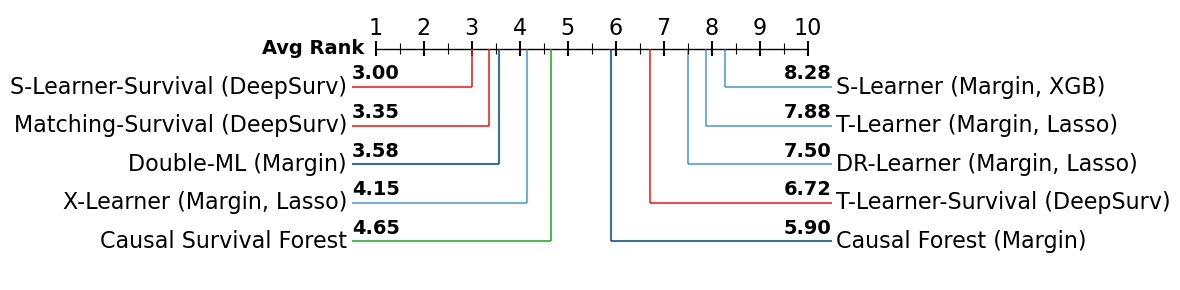

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulate reading from a provided DataFrame (in practice, this would be loaded from a file)
df = borda_table_subset.copy()

# Mapping for cleaner display names
method_label_map = {
    "s_learner_survival+DeepSurv": "S-Learner-Survival (DeepSurv)",
    "matching_learner_survival+DeepSurv": "Matching-Survival (DeepSurv)",
    "double_ml+Margin": "Double-ML (Margin)",
    "x_learner+Margin+lasso": "X-Learner (Margin, Lasso)",
    "causal_survival_forest": "Causal Survival Forest",
    "causal_forest+Margin": "Causal Forest (Margin)",
    "t_learner_survival+DeepSurv": "T-Learner-Survival (DeepSurv)",
    "dr_learner+Margin+lasso": "DR-Learner (Margin, Lasso)",
    "t_learner+Margin+lasso": "T-Learner (Margin, Lasso)",
    "s_learner+Margin+xgb": "S-Learner (Margin, XGB)"
}

method_color_map = {
    "s_learner_survival+DeepSurv": (214/255, 39/255, 40/255, 0.8),  
    "matching_learner_survival+DeepSurv": (214/255, 39/255, 40/255, 0.8),  
    "double_ml+Margin": (8/255, 77/255, 117/255, 0.8),  
    "x_learner+Margin+lasso": (31/255, 119/255, 180/255, 0.6),  
    "causal_survival_forest": (44/255, 160/255, 44/255, 0.8),  
    "causal_forest+Margin": (8/255, 77/255, 117/255, 0.8),  
    "t_learner_survival+DeepSurv": (214/255, 39/255, 40/255, 0.8),  
    "dr_learner+Margin+lasso":(31/255, 119/255, 180/255, 0.6),  
    "t_learner+Margin+lasso": (31/255, 119/255, 180/255, 0.6),  
    "s_learner+Margin+xgb": (31/255, 119/255, 180/255, 0.6),  
}

# Apply mapping
df["clean_label"] = df["method"].map(method_label_map)

# Sort by rank and split
df = df.sort_values("avg_borda_rank")
top_5 = df.iloc[:5].copy()
bottom_5 = df.iloc[5:].copy()[::-1]  # reverse for bottom 5

# Plot
fig, ax = plt.subplots(figsize=(12, 3))

# Horizontal axis
ax.hlines(y=0, xmin=1, xmax=10, color='black', linewidth=1)
for x in range(1, 11):
    ax.vlines(x=x, ymin=-0.2, ymax=0.2, color='black')
ax.text(0.75, 0, "Avg Rank", ha='right', va='center', fontsize=14, fontweight='bold')

# Top 5 (blue)
for i, row in top_5.iterrows():
    y_val = -1 - i
    ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color = method_color_map[row["method"]])
    ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=0.5, color = method_color_map[row["method"]])
    ax.text(0.4, y_val, row["clean_label"], ha='right', va='center', fontsize=16)
    ax.text(1, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

# Bottom 5 (red)
for i, row in bottom_5.iterrows():
    y_val = -1 - (9 - i)
    ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color = method_color_map[row["method"]])
    ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=10.5, color = method_color_map[row["method"]])
    ax.text(10.6, y_val, row["clean_label"], ha='left', va='center', fontsize=16)
    ax.text(10, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

# Half-step tick marks (e.g., 1.5, 2.5, ..., 9.5)
for x in [i + 0.5 for i in range(1, 10)]:
    ax.vlines(x=x, ymin=-0.15, ymax=0.15, color='black', linewidth=0.8)  # thinner and shorter

# Axis config
ax.set_xlim(0.5, 10.5)
ax.set_ylim(-6, 1)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11), fontsize=16)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=True, pad=-25)
ax.set_yticks([])
# ax.set_title("Custom Borda Ranking Visualization", fontsize=13)
plt.tight_layout()
plt.grid(False)
plt.box(False)

fig.savefig("figure_results/average_ranks/average_ranking_visualization_method_combination.pdf", dpi=300, bbox_inches='tight')

plt.show()


In [13]:
# Average performance across all variants of each abstract method
df_results["abstract_method"] = df_results["method"].apply(
    lambda m: m.split("+")[0] if "+" in m else m
)

# Compute mean CATE MSE for each abstract method across all variants
avg_df = df_results.groupby(["abstract_method", "experiment_setup", "scenario"])["cate_mse"].mean().reset_index()

# Pivot and rank
pivot_abstract = avg_df.pivot_table(
    index="abstract_method", columns=["experiment_setup", "scenario"], values="cate_mse"
)
rank_abstract = pivot_abstract.rank(axis=0, method='min', ascending=True)

# Average rank across all settings
avg_rank_abstract = rank_abstract.mean(axis=1).sort_values()

# Create final ranking table
borda_table_abstract = avg_rank_abstract.reset_index()
borda_table_abstract.columns = ["abstract_method", "avg_borda_rank"]

borda_table_abstract


,abstract_method,avg_borda_rank
0,double_ml,2.850
1,causal_survival_forest,3.125
2,s_learner_survival,3.450
3,matching_learner_survival,4.425
4,causal_forest,4.825
5,x_learner,5.075
6,t_learner_survival,6.025
7,s_learner,6.625
8,t_learner,8.700
9,dr_learner,9.900


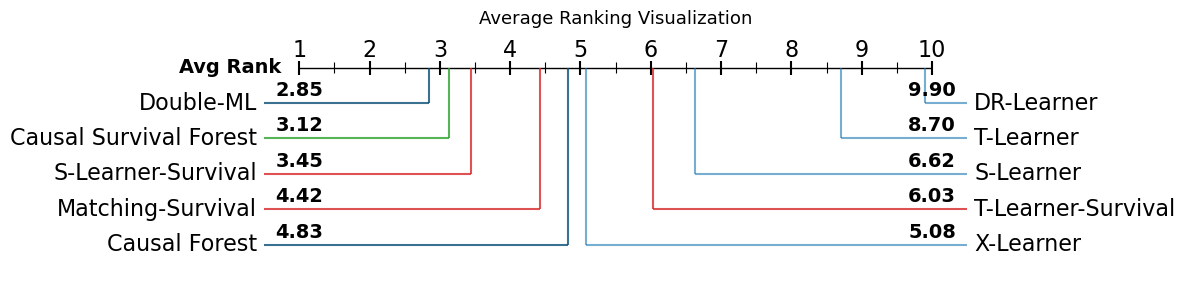

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulate reading from a provided DataFrame (in practice, this would be loaded from a file)
df = borda_table_abstract.copy()

# Mapping for cleaner display names
method_label_map = {
    "s_learner_survival": "S-Learner-Survival",
    "matching_learner_survival": "Matching-Survival",
    "double_ml": "Double-ML",
    "x_learner": "X-Learner",
    "causal_survival_forest": "Causal Survival Forest",
    "causal_forest": "Causal Forest",
    "t_learner_survival": "T-Learner-Survival",
    "dr_learner": "DR-Learner",
    "t_learner": "T-Learner",
    "s_learner": "S-Learner"
}

method_color_map = {
    "s_learner_survival": (214/255, 39/255, 40/255, 0.8),  
    "matching_learner_survival": (214/255, 39/255, 40/255, 0.8),  
    "double_ml": (8/255, 77/255, 117/255, 0.8),  
    "x_learner": (31/255, 119/255, 180/255, 0.6),  
    "causal_survival_forest": (44/255, 160/255, 44/255, 0.8),  
    "causal_forest": (8/255, 77/255, 117/255, 0.8),  
    "t_learner_survival": (214/255, 39/255, 40/255, 0.8),  
    "dr_learner":(31/255, 119/255, 180/255, 0.6),  
    "t_learner": (31/255, 119/255, 180/255, 0.6),  
    "s_learner": (31/255, 119/255, 180/255, 0.6),  
}

# Apply mapping
df["clean_label"] = df["abstract_method"].map(method_label_map)

# Sort by rank and split
df = df.sort_values("avg_borda_rank")
top_5 = df.iloc[:5].copy()
bottom_5 = df.iloc[5:].copy()[::-1]  # reverse for bottom 5

# Plot
fig, ax = plt.subplots(figsize=(12, 3))

# Horizontal axis
ax.hlines(y=0, xmin=1, xmax=10, color='black', linewidth=1)
for x in range(1, 11):
    ax.vlines(x=x, ymin=-0.2, ymax=0.2, color='black')
ax.text(0.75, 0, "Avg Rank", ha='right', va='center', fontsize=14, fontweight='bold')

# Top 5 (blue)
for i, row in top_5.iterrows():
    y_val = -1 - i
    ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color = method_color_map[row["abstract_method"]])
    ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=0.5, color = method_color_map[row["abstract_method"]])
    ax.text(0.4, y_val, row["clean_label"], ha='right', va='center', fontsize=16)
    ax.text(1, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

# Bottom 5 (red)
for i, row in bottom_5.iterrows():
    y_val = -1 - (9 - i)
    ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color = method_color_map[row["abstract_method"]])
    ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=10.5, color = method_color_map[row["abstract_method"]])
    ax.text(10.6, y_val, row["clean_label"], ha='left', va='center', fontsize=16)
    ax.text(10, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

# Half-step tick marks (e.g., 1.5, 2.5, ..., 9.5)
for x in [i + 0.5 for i in range(1, 10)]:
    ax.vlines(x=x, ymin=-0.15, ymax=0.15, color='black', linewidth=0.8)  # thinner and shorter

# Axis config
ax.set_xlim(0.5, 10.5)
ax.set_ylim(-6, 1)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11), fontsize=16)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=True, pad=-25)
ax.set_yticks([])
ax.set_title("Average Ranking Visualization", fontsize=13)
plt.tight_layout()
plt.grid(False)
plt.box(False)

fig.savefig("figure_results/average_ranks/average_ranking_visualization_abstract_method.pdf", dpi=300, bbox_inches='tight')

plt.show()


# Conditional Borda Rank Helper Functions

In [16]:
import pandas as pd

def get_best_variant_borda_table(df_results: pd.DataFrame, borda_table: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the best-performing variant (lowest avg_borda_rank) for each abstract method and returns a Borda table.

    Parameters:
    - df_results: DataFrame with performance results including 'method', 'experiment_setup', 'scenario', and 'cate_mse'.
    - borda_table: DataFrame with 'method' and 'avg_borda_rank' columns.

    Returns:
    - borda_table_subset: DataFrame with the best method from each abstract category and their avg_borda_rank.
    """

    abstract_methods = {
        "t_learner": [],
        "s_learner": [],
        "x_learner": [],
        "dr_learner": [],
        "double_ml": [],
        "causal_forest": [],
        "causal_survival_forest": [],
        "t_learner_survival": [],
        "s_learner_survival": [],
        "matching_learner_survival": []
    }

    for method in borda_table["method"]:
        for abstract in abstract_methods:
            if abstract == "causal_survival_forest":
                if method.startswith(abstract):
                    abstract_methods[abstract].append(method)
            else:
                if method.startswith(abstract + "+"):
                    abstract_methods[abstract].append(method)

    best_methods = []
    for abstract, variants in abstract_methods.items():
        if not variants:
            continue
        best_variant = (
            borda_table[borda_table["method"].isin(variants)]
            .sort_values("avg_borda_rank")
            .iloc[0]["method"]
        )
        best_methods.append(best_variant)

    pivot_df_subset = df_results[df_results["method"].isin(best_methods)].pivot_table(
        index="method", columns=["experiment_setup", "scenario"], values="cate_mse"
    )
    rank_df_subset = pivot_df_subset.rank(axis=0, method='min', ascending=True)
    avg_rank_subset = rank_df_subset.mean(axis=1).sort_values()

    borda_table_subset = avg_rank_subset.reset_index()
    borda_table_subset.columns = ["method", "avg_borda_rank"]

    return borda_table_subset


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_borda_ranking(borda_table_subset: pd.DataFrame, save_suffix: str = ""):
    """
    Plots a custom Borda ranking visualization from the given Borda table.
    The method names are parsed to generate clean labels and color-coded lines.

    Parameters:
    - borda_table_subset: DataFrame with 'method' and 'avg_borda_rank' columns.
    """

    # Mapping dictionaries
    meta_map = {
        "t_learner": "T-Learner", "s_learner": "S-Learner", "x_learner": "X-Learner", "dr_learner": "DR-Learner"
    }
    impute_map = {
        "Pseudo_obs": "Pseudo-Obs", "Margin": "Margin", "IPCW-T": "IPCW-T"
    }
    base_model_map = {
        "lasso": "Lasso", "xgb": "XGB", "rf": "RandomForest"
    }
    dml_map = {
        "double_ml": "Double-ML", "causal_forest": "Causal Forest"
    }
    survival_meta_map = {
        "t_learner_survival": "T-Learner-Survival",
        "s_learner_survival": "S-Learner-Survival",
        "matching_learner_survival": "Matching-Survival"
    }
    base_survival_map = {"DeepSurv": "DeepSurv", "DeepHit": "DeepHit", "RandomSurvivalForest": "RSF"}

    def get_clean_label(method):
        parts = method.split("+")
        if len(parts) == 1 and parts[0] == "causal_survival_forest":
            return "Causal Survival Forest"
        elif len(parts) == 2:
            if parts[0] in dml_map:
                return f"{dml_map[parts[0]]} ({impute_map.get(parts[1], parts[1])})"
            elif parts[0] in survival_meta_map:
                return f"{survival_meta_map[parts[0]]} ({base_survival_map[parts[1]]})"
        elif len(parts) == 3:
            return f"{meta_map[parts[0]]} ({impute_map.get(parts[1], parts[1])}, {base_model_map.get(parts[2], parts[2])})"
        return method  # fallback in case of unknown structure

    def get_color(method):
        parts = method.split("+")
        if len(parts) == 1:
            return (44/255, 160/255, 44/255, 0.8)
        elif len(parts) == 2:
            if parts[0] in dml_map:
                return (8/255, 77/255, 117/255, 0.8)
            elif parts[0] in survival_meta_map:
                return (214/255, 39/255, 40/255, 0.8)
        elif len(parts) == 3:
            return (31/255, 119/255, 180/255, 0.6)
        return (0.5, 0.5, 0.5, 0.5)  # default gray

    df = borda_table_subset.copy()
    df["clean_label"] = df["method"].apply(get_clean_label)
    df["color"] = df["method"].apply(get_color)

    # Sort and split
    df = df.sort_values("avg_borda_rank")
    top_5 = df.iloc[:5].copy()
    bottom_5 = df.iloc[5:].copy()[::-1]

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 3))

    ax.hlines(y=0, xmin=1, xmax=10, color='black', linewidth=1)
    for x in range(1, 11):
        ax.vlines(x=x, ymin=-0.2, ymax=0.2, color='black')
    ax.text(0.75, 0, "Avg Rank", ha='right', va='center', fontsize=14, fontweight='bold')

    for i, row in top_5.iterrows():
        y_val = -1 - i
        ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color=row["color"])
        ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=0.5, color=row["color"])
        ax.text(0.4, y_val, row["clean_label"], ha='right', va='center', fontsize=16)
        ax.text(1, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

    for i, row in bottom_5.iterrows():
        y_val = -1 - (9 - i)
        ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color=row["color"])
        ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=10.5, color=row["color"])
        ax.text(10.6, y_val, row["clean_label"], ha='left', va='center', fontsize=16)
        ax.text(10, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

    for x in [i + 0.5 for i in range(1, 10)]:
        ax.vlines(x=x, ymin=-0.15, ymax=0.15, color='black', linewidth=0.8)

    ax.set_xlim(0.5, 10.5)
    ax.set_ylim(-6, 1)
    ax.set_xticks(range(1, 11))
    ax.set_xticklabels(range(1, 11), fontsize=16)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=True, pad=-25)
    ax.set_yticks([])
    plt.tight_layout()
    plt.grid(False)
    plt.box(False)

    fig.savefig(f"figure_results/average_ranks/average_ranking_visualization_method_combination_{save_suffix}.pdf", dpi=300, bbox_inches='tight')

    plt.show()


# Scenario-wise performance


=== Scenario: scenario_1 ===


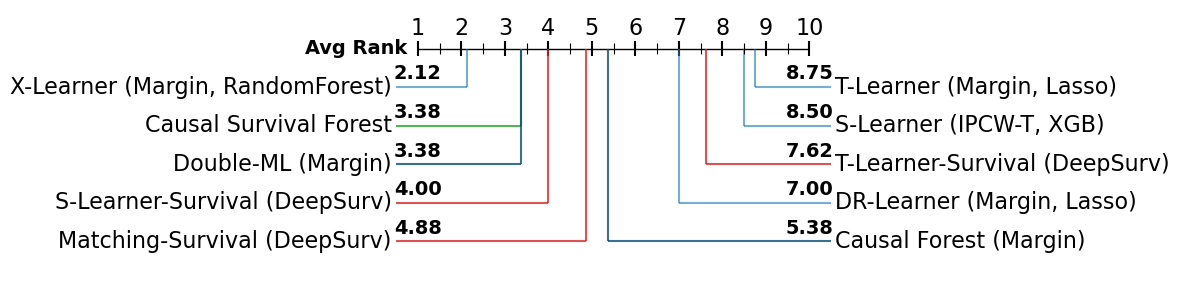


=== Scenario: scenario_2 ===


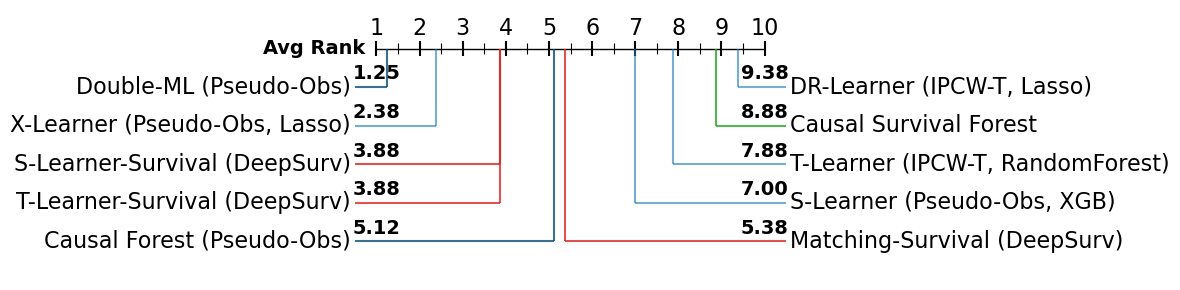


=== Scenario: scenario_5 ===


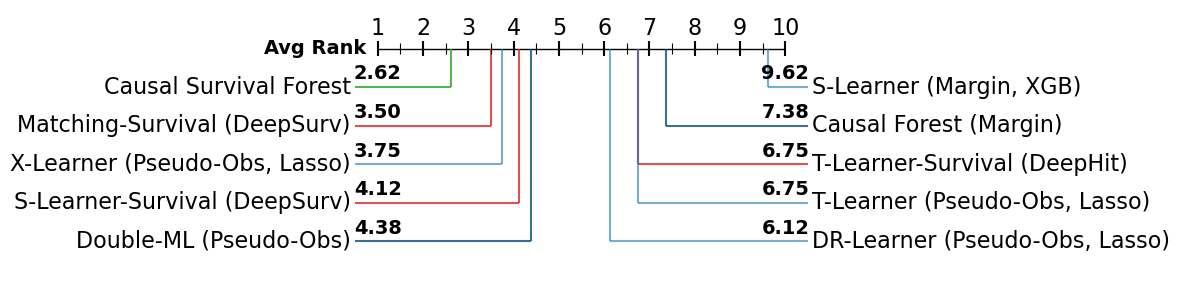


=== Scenario: scenario_8 ===


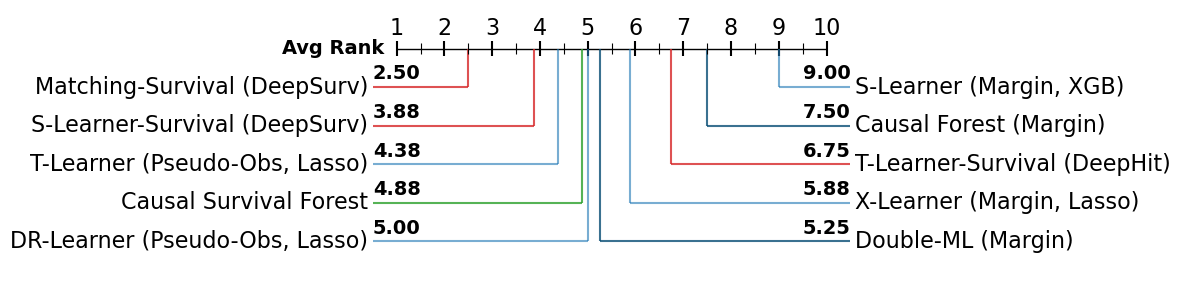


=== Scenario: scenario_9 ===


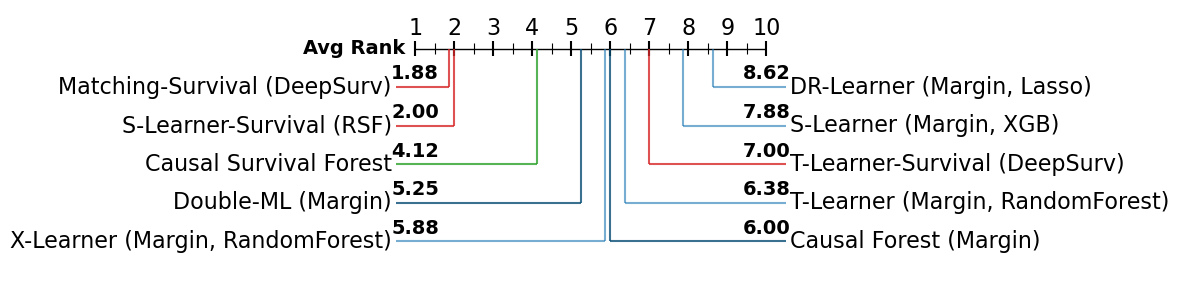

In [35]:
for scen in df_results['scenario'].unique():

    print(f"\n=== Scenario: {scen} ===")

    # Filter DataFrame
    df_results_cur_scen = df_results[df_results['scenario'] == scen].copy()

    # Perform Borda count ranking
    pivot_df_cur_scen = df_results_cur_scen.pivot_table(index="method", columns=["experiment_setup", "scenario"], values="cate_mse")

    # Rank each column: lower mse is better (rank 1 is best)
    rank_df_cur_scen = pivot_df_cur_scen.rank(axis=0, method='min', ascending=True)

    # Average rank across all settings
    avg_rank_cur_scen = rank_df_cur_scen.mean(axis=1).sort_values()

    # Create final ranking table
    borda_table_cur_scen = avg_rank_cur_scen.reset_index()
    borda_table_cur_scen.columns = ["method", "avg_borda_rank"]

    borda_table_cur_scen  # Final ranking table based on average ranks across 40 settings

    borda_table_cur_scen_subset = get_best_variant_borda_table(df_results_cur_scen, borda_table_cur_scen)
    plot_borda_ranking(borda_table_cur_scen_subset, save_suffix=scen)

    print("======================")

# Experiment-wise Performance


=== Experiment Setup: RCT_0_5 ===


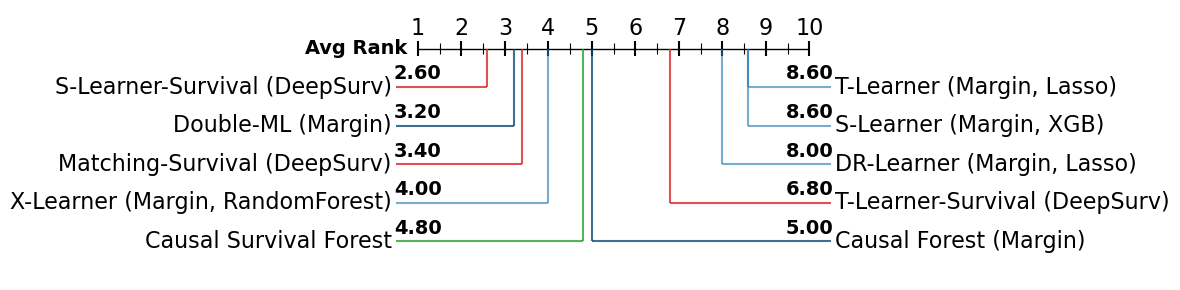


=== Experiment Setup: RCT_0_05 ===


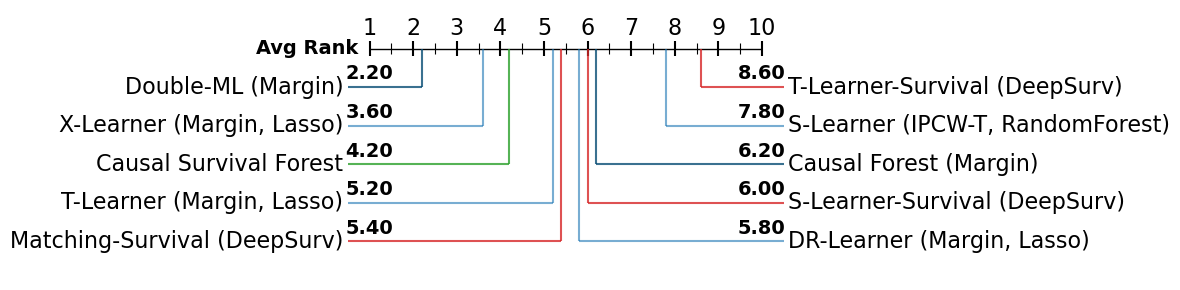


=== Experiment Setup: e_X ===


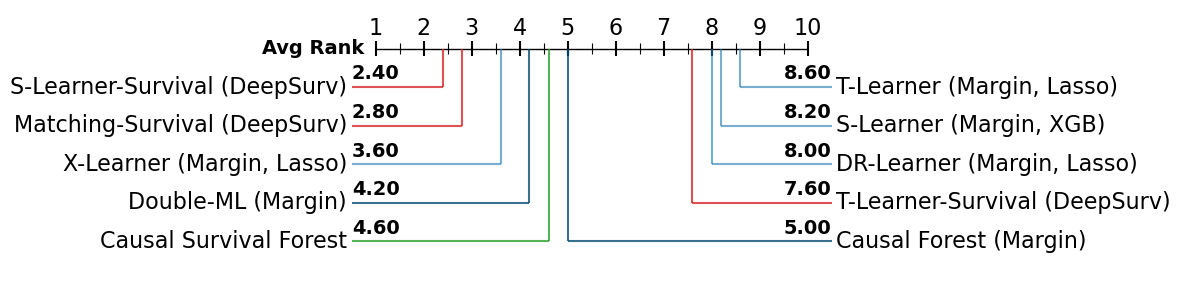


=== Experiment Setup: e_X_U ===


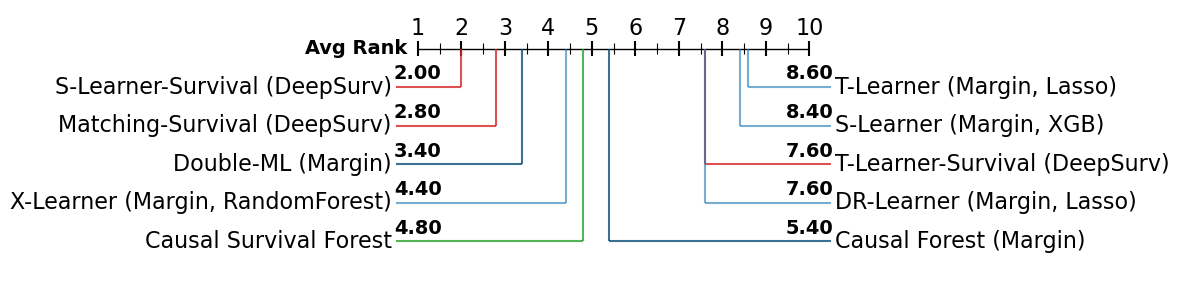


=== Experiment Setup: e_X_no_overlap ===


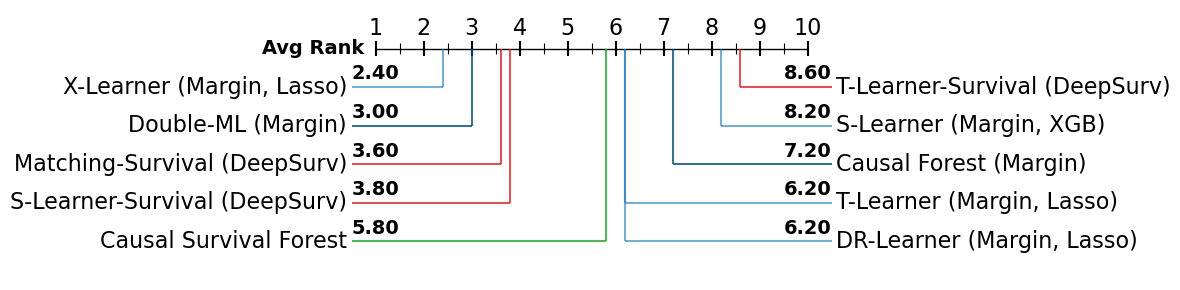


=== Experiment Setup: e_X_info_censor ===


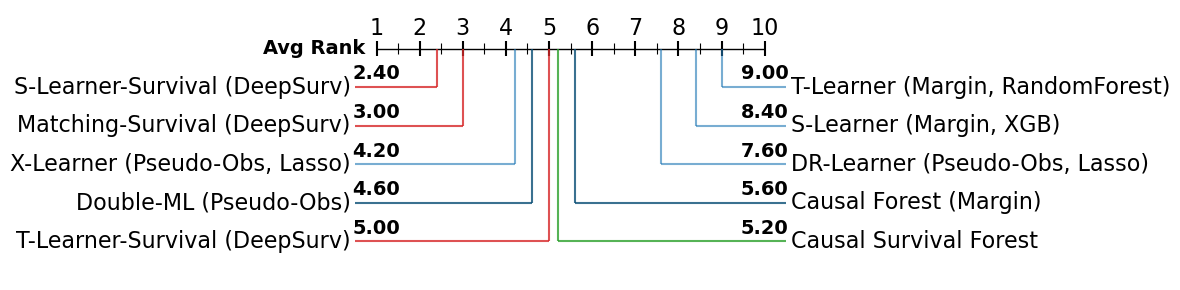


=== Experiment Setup: e_X_U_info_censor ===


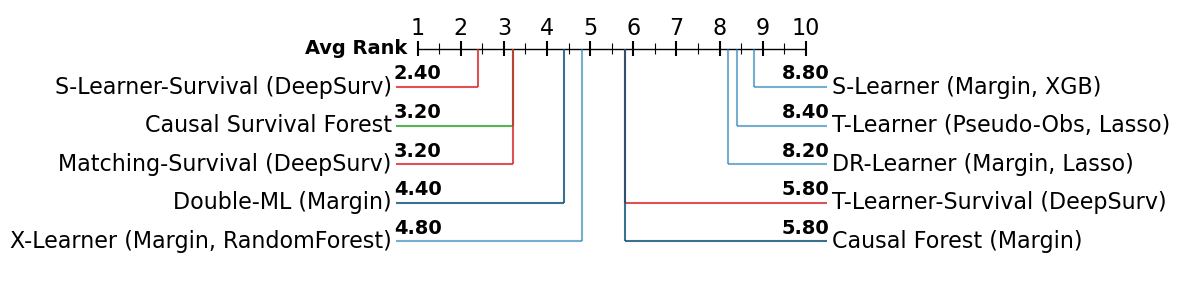


=== Experiment Setup: e_X_no_overlap_info_censor ===


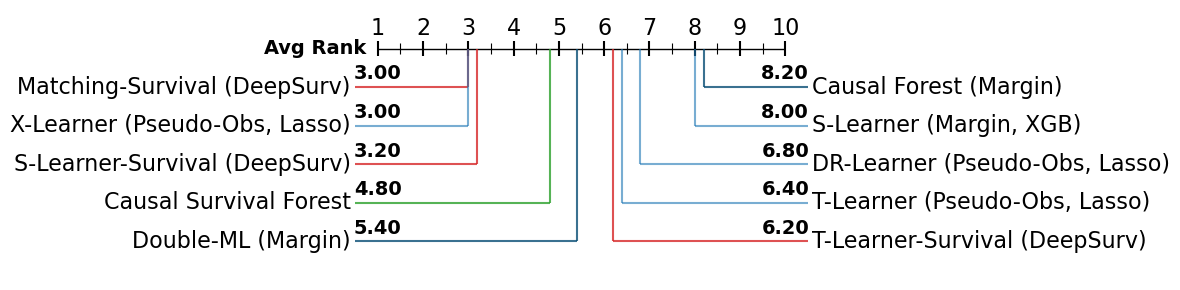

In [36]:
for exp in df_results['experiment_setup'].unique():

    print(f"\n=== Experiment Setup: {exp} ===")

    # Filter DataFrame
    df_results_cur_exp = df_results[df_results['experiment_setup'] == exp].copy()

    # Perform Borda count ranking
    pivot_df_cur_exp = df_results_cur_exp.pivot_table(index="method", columns=["experiment_setup", "scenario"], values="cate_mse")

    # Rank each column: lower mse is better (rank 1 is best)
    rank_df_cur_exp = pivot_df_cur_exp.rank(axis=0, method='min', ascending=True)

    # Average rank across all settings
    avg_rank_cur_exp = rank_df_cur_exp.mean(axis=1).sort_values()

    # Create final ranking table
    borda_table_cur_exp = avg_rank_cur_exp.reset_index()
    borda_table_cur_exp.columns = ["method", "avg_borda_rank"]

    borda_table_cur_exp  # Final ranking table based on average ranks across 40 settings

    borda_table_cur_exp_subset = get_best_variant_borda_table(df_results_cur_exp, borda_table_cur_exp)
    plot_borda_ranking(borda_table_cur_exp_subset, save_suffix=exp)

    print("======================")
    # break